<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Data_Sprint_44_Tweets_Abuse_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

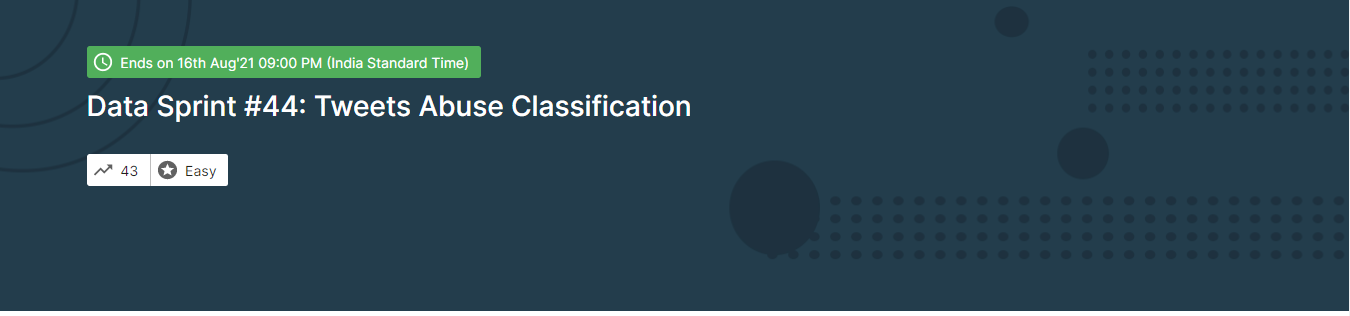

## Problem Statement
 

Out of many social media sites, Twitter has some unique characteristics which attract diverse categories of people. Twitter has been utilized as an important source of user-generated data that can provide unique insights into population. Many of these studies involve retrieving tweets for sentiment analysis, named entity recognition and disambiguation tasks.  In recent decades we have noticed a considerable increase in reports or confession posts of abuse victims on twitter. Most of the time victims do not report it to their guardians or the concerned authorities. Part of these victims tweet about their incident to let go of pain and suffering or as a cry for help. Identifying such reports is challenging. 

 

We are providing a small scaled corpus on tweet reportings, you are required to build a machine learning model to classify the abuse tweets.

 

## Evaluation
Submissions are evaluated using Weighted F1 Score.

In [34]:
!pip install texthero

     |████████████████████████████████| 1.5 MB 7.8 MB/s 
     |████████████████████████████████| 241 kB 41.6 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [35]:
from google.colab import files
files.upload()

Saving Sample_Submission (3).csv to Sample_Submission (3) (1).csv
Saving Test_Data (2).csv to Test_Data (2) (1).csv
Saving Train_Data (3).csv to Train_Data (3) (1).csv


{'Sample_Submission (3).csv': b'label\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n2\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n1\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n2\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n1\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n1\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n2\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n1\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n1\r\n3\r\n3\r\n2\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n2\r\n2\r\n2\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n1\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n1\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\n3\r\

In [2]:
from google.colab import drive
drive.mount("/content/disk")

Mounted at /content/disk


In [2]:
import pandas as pd
import numpy as np
import texthero as hero
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("/content/Train_Data (3).csv")
test = pd.read_csv("/content/Test_Data (2).csv")
sub = pd.read_csv("/content/Sample_Submission (3).csv")

In [4]:
train.head()

,tweet,label
0,start your day w your daily here,3
1,even a perfect life doesn’t feel perfect in so...,3
2,great ready for next week s q amp a with white...,3
3,5 ways to protect your mental health during th...,3
4,i m officially an occupational therapist passe...,3


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   2349 non-null   object
 1   label   2350 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 36.8+ KB


## Visualize labels

In [5]:
def change_labels(x):
  if x == 1:
    return 0
  elif x == 2:
    return 1
  else:
    return 2

In [6]:
train['label'] = train['label'].map(change_labels)

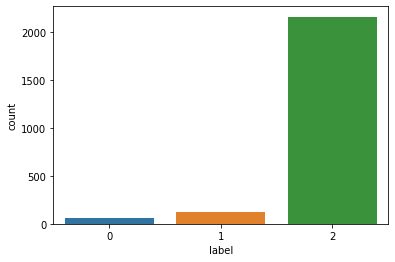

In [7]:
sns.countplot(train['label'])

##Check for missing tweets

In [8]:
train.isnull().sum()[train.isnull().sum() > 0]

tweet    1
dtype: int64

In [9]:
train[train['tweet'].isnull()]

,tweet,label
2302,NaN,2


In [10]:
train.shape

(2350, 2)

In [11]:
train = train.dropna()

In [12]:
train.shape

(2349, 2)

In [13]:
test.isnull().sum()[test.isnull().sum() > 0]

Series([], dtype: int64)

## Extract Features

In [14]:
train_texts = train['tweet'].values.tolist()
train_labels = train['label'].values.tolist()
test_texts = test['tweet'].values.tolist()

In [15]:
len(train_texts)

2349

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.1,random_state=42,stratify=train_labels)

## Install Transformers

In [17]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 5.3 MB/s 
     |████████████████████████████████| 636 kB 69.2 MB/s 
     |████████████████████████████████| 3.3 MB 60.1 MB/s 
     |████████████████████████████████| 895 kB 59.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Fine Tuning Custom models

* Prepare dataset
* Load pretrained tokenizer, call it with dataset
* Build Pytorch datasets with encodings
* Load pretrained Model
* Load Trainer and train it OR use native Pytorch training Pipeline

## Import required transformer libraries

In [18]:
import torch
from torch.utils.data import Dataset
from transformers import DistilBertTokenizerFast,DistilBertForSequenceClassification
from transformers import Trainer,TrainingArguments

In [19]:
torch.__version__

'1.9.0+cu102'

##Set Model Name

In [20]:
model_name  = 'distilbert-base-uncased'

## Tokenization

In [21]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased',num_labels=3)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

In [16]:
tokenizer

PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

* We can simply pass our texts to the tokenizer. We’ll pass truncation=True and padding=True, which will ensure that all of our sequences are padded to the same length and are truncated to be no longer model’s maximum input length

* This will allow us to feed batches of sequences into the model at the same time.

In [22]:
train_encodings = tokenizer(train_texts, truncation=True, padding="max_length",max_length=512,return_tensors = 'pt')
val_encodings = tokenizer(val_texts, truncation=True, padding="max_length",max_length=512,return_tensors = 'pt')
test_encodings = tokenizer(test_texts,truncation=True, padding="max_length",max_length=512,return_tensors = 'pt')

* in case null values are present solutio : https://stackoverflow.com/questions/63517293/valueerror-textencodeinput-must-be-uniontextinputsequence-tupleinputsequence

## Turn labels and encodings into a Dataset object

* In PyTorch, this is done by subclassing a torch.utils.data.Dataset object and implementing len and getitem.

In [23]:
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [24]:
class SentimentTestDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        return item
    def __len__(self):
        return len(self.encodings)

## Genearte DataLoaders

In [25]:
test['label'] = 0
test_labels = test['label'].values.tolist()
train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)
test_dataset = SentimentTestDataset(test_encodings)

In [26]:
train_dataset.__getitem__(0)['input_ids'].shape

torch.Size([512])

In [27]:
val_dataset.__getitem__(0)['input_ids'].shape

torch.Size([512])

In [28]:
test_dataset.__getitem__(0)['input_ids'].shape

torch.Size([512])

##Fine-tuning with Trainer

In [29]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    #recall = recall_score(y_true=labels, y_pred=pred)
    #precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(labels, pred, average='weighted')

    return {"accuracy": accuracy,"f1_score":f1}


## Training Arguement Parameters

In [32]:
training_args = TrainingArguments(
    output_dir="output",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    seed=0,
    load_best_model_at_end=True,)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


## Define and train the Model

In [40]:
CUDA_LAUNCH_BLOCKING=1.

In [33]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased",num_labels=3)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset ,            # evaluation dataset
    compute_metrics=compute_metrics,
)

trainer.train()

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.d423bdf2f58dc8b77d5f5d18028d7ae4a72dcfd8f468e81fe979ada957a8c361
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.9.2",
  "vocab_size": 30522
}

loading weights file https://huggingface.co/distilbert-ba

Step,Training Loss,Validation Loss


Step,Training Loss,Validation Loss


KeyboardInterrupt: ignored